<a href="https://colab.research.google.com/github/ahorvath008/Data-Science/blob/main/Copy_of_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Introduction and Project Overview

** Purpose: ** To perform analytics on Covid-19 data

** Data: ** The data used is from a dedicated open source Covid-19 API.  (Corona-API.com)

Table of Contents

Data import and data wrangling
Data characteristics
Exploratory Data Analysis (EDA)
Data visualisations and graphs


# 1.Importing Critical Components

In [2]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import seaborn as sns
import scipy as stats
import json
import flask
from matplotlib import pyplot as plt 
from collections import Counter
from datetime import datetime, timedelta


# 2.Establishing the connection to the API

In [3]:
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

In [4]:
#! pip install folium==0.5.0
#import folium # plotting library

In [5]:
# Establish a connection to the Coronavirus API to get country level data
url = 'https://corona-api.com/countries?format=json'

In [6]:
# Grab the data from the file in json format
results = requests.get(url).json()
results

{'data': [{'coordinates': {'latitude': 33, 'longitude': 65},
   'name': 'Afghanistan',
   'code': 'AF',
   'population': 29121286,
   'updated_at': '2022-09-30T00:10:49.472Z',
   'today': {'deaths': 0, 'confirmed': 0},
   'latest_data': {'deaths': 7198,
    'confirmed': 155019,
    'recovered': 123527,
    'critical': 24294,
    'calculated': {'death_rate': 4.643301788812984,
     'recovery_rate': 79.68507086228139,
     'recovered_vs_death_ratio': None,
     'cases_per_million_population': 1124}}},
  {'coordinates': {'latitude': 41, 'longitude': 20},
   'name': 'Albania',
   'code': 'AL',
   'population': 2986952,
   'updated_at': '2022-09-30T00:10:49.472Z',
   'today': {'deaths': 0, 'confirmed': 0},
   'latest_data': {'deaths': 2619,
    'confirmed': 166690,
    'recovered': 151914,
    'critical': 12157,
    'calculated': {'death_rate': 1.5711800347951288,
     'recovery_rate': 91.13564101025857,
     'recovered_vs_death_ratio': None,
     'cases_per_million_population': 3}}},
  {'c

In [7]:
# assign relevant part of JSON to countries
data = results['data']

# tranform venues into a dataframe
df = json_normalize(data)
df.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,name,code,population,updated_at,coordinates.latitude,coordinates.longitude,today.deaths,today.confirmed,latest_data.deaths,latest_data.confirmed,latest_data.recovered,latest_data.critical,latest_data.calculated.death_rate,latest_data.calculated.recovery_rate,latest_data.calculated.recovered_vs_death_ratio,latest_data.calculated.cases_per_million_population
0,Afghanistan,AF,29121286.0,2022-09-30T00:10:49.472Z,33.0,65.0,0,0,7198,155019,123527,24294,4.643302,79.685071,None,1124
1,Albania,AL,2986952.0,2022-09-30T00:10:49.472Z,41.0,20.0,0,0,2619,166690,151914,12157,1.571180,91.135641,None,3
2,Åland Islands,AX,26711.0,2022-09-30T00:10:49.472Z,0.0,0.0,0,0,0,0,0,0,NaN,NaN,None,0
3,American Samoa,AS,57881.0,2022-09-30T00:10:49.472Z,0.0,0.0,0,0,0,0,0,0,NaN,NaN,None,0
4,Algeria,DZ,34586184.0,2022-09-30T00:10:49.472Z,28.0,3.0,0,0,5758,202449,138632,58059,2.844173,68.477493,None,20


In [8]:
# # Establish a connection to the Coronavirus API to get overall trend data
url_timelines ='https://corona-api.com/timeline?format=json'
results_timelines = requests.get(url_timelines).json()
results_timelines

{'data': [{'updated_at': '2022-09-29T04:22:34.000Z',
   'date': '2022-09-29',
   'deaths': 6513675,
   'confirmed': 615032035,
   'recovered': 0,
   'new_confirmed': 496267,
   'new_recovered': 0,
   'new_deaths': 2220,
   'active': 608518360},
  {'updated_at': '2022-09-28T04:23:01.000Z',
   'date': '2022-09-28',
   'deaths': 6511455,
   'confirmed': 614535768,
   'recovered': 0,
   'new_confirmed': 589057,
   'new_recovered': 0,
   'new_deaths': 1558,
   'active': 608024313},
  {'updated_at': '2022-09-27T04:23:01.000Z',
   'date': '2022-09-27',
   'deaths': 6509897,
   'confirmed': 613946711,
   'recovered': 0,
   'new_confirmed': 464385,
   'new_recovered': 0,
   'new_deaths': 1347,
   'active': 607436814},
  {'updated_at': '2022-09-26T04:20:52.000Z',
   'date': '2022-09-26',
   'deaths': 6508550,
   'confirmed': 613482352,
   'recovered': 0,
   'new_confirmed': 221459,
   'new_recovered': 0,
   'new_deaths': 456,
   'active': 606973802},
  {'updated_at': '2022-09-25T04:23:31.000Z',


# 3.Data Wrangling

In [9]:
#Rename some of the headers to make the file more readable
df.rename(columns={'latest_data.deaths':'total_death'}, inplace=True)
df.rename(columns={'latest_data.confirmed':'total_cases'}, inplace=True)
df.rename(columns={'name':'country'}, inplace=True)
df.rename(columns={'latest_data.calculated.death_rate':'deathrate'}, inplace=True)
df.rename(columns={'latest_data.calculated.recovery_rate':'recoveryrate'}, inplace=True)
df.rename(columns={'latest_data.recovered':'total_recovered'}, inplace=True)
df.rename(columns={'calculated.cases_per_million_population':'cases_per_million'}, inplace=True)

In [10]:
#Drop columns that are not required for analytics (coordinates)
df.drop(['coordinates.latitude', 'coordinates.longitude', 'code'], axis=1, inplace=True)

In [11]:
# assign relevant part of JSON
data_timelines = results_timelines['data']
# tranform timelines into a dataframe
df_timelines = json_normalize(data_timelines)
df_timelines.shape
df_timelines.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  after removing the cwd from sys.path.


,updated_at,date,deaths,confirmed,recovered,new_confirmed,new_recovered,new_deaths,active
0,2022-09-29T04:22:34.000Z,2022-09-29,6513675,615032035,0,496267,0,2220,608518360
1,2022-09-28T04:23:01.000Z,2022-09-28,6511455,614535768,0,589057,0,1558,608024313
2,2022-09-27T04:23:01.000Z,2022-09-27,6509897,613946711,0,464385,0,1347,607436814
3,2022-09-26T04:20:52.000Z,2022-09-26,6508550,613482352,0,221459,0,456,606973802
4,2022-09-25T04:23:31.000Z,2022-09-25,6508094,613260893,0,261913,0,739,606752799


In [12]:
# Convert the dates to correct date format
df_timelines['date'] = pd.to_datetime(df_timelines['date'])
# Create a year column and add it to the data
df_timelines['year'] = df_timelines['date'].dt.year
df_timelines['month'] = df_timelines['date'].dt.month
df_timelines.head(5)

,updated_at,date,deaths,confirmed,recovered,new_confirmed,new_recovered,new_deaths,active,year,month
0,2022-09-29T04:22:34.000Z,2022-09-29,6513675,615032035,0,496267,0,2220,608518360,2022,9
1,2022-09-28T04:23:01.000Z,2022-09-28,6511455,614535768,0,589057,0,1558,608024313,2022,9
2,2022-09-27T04:23:01.000Z,2022-09-27,6509897,613946711,0,464385,0,1347,607436814,2022,9
3,2022-09-26T04:20:52.000Z,2022-09-26,6508550,613482352,0,221459,0,456,606973802,2022,9
4,2022-09-25T04:23:31.000Z,2022-09-25,6508094,613260893,0,261913,0,739,606752799,2022,9


# 4.Data Analysis and Visualisations

In [13]:
#Calculate total recovery rate and include it in the dataframe
df["Recovery_rate"] = df["total_recovered"] / df["total_cases"]

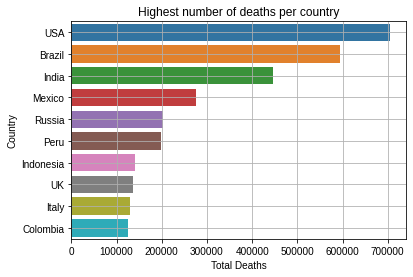

In [14]:
#Top 10 countries with highest number of Covid cases (total cases)
df_high = df.sort_values(by="total_death", ascending=False)
df_high_top = df_high.head(10)

# Graph out the highest number of deaths during the pandemic 
sns.barplot(data=df_high_top, y='country', x='total_death') 
plt.style.use('seaborn')
plt.ylabel('Country')
plt.xlabel('Total Deaths')
plt.title("Highest number of deaths per country")
plt.grid(True)

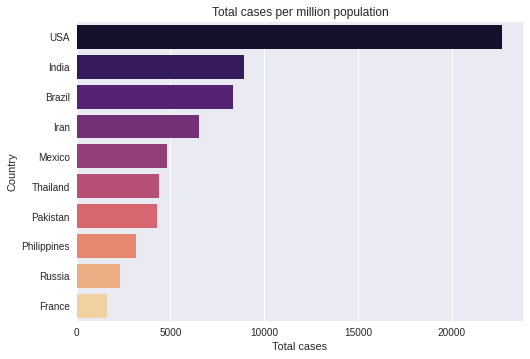

In [15]:
#Top 10 countries with cases (total per population)
df_million = df.sort_values(by="latest_data.calculated.cases_per_million_population", ascending=False)
df_million = df_million.head(10)
#Top 10 countries with cases (total cases per one million)
sns.barplot(data=df_million, y='country', x='latest_data.calculated.cases_per_million_population', palette='magma')
plt.style.use('seaborn')
plt.ylabel('Country')
plt.xlabel('Total cases')
plt.title("Total cases per million population")
plt.show()

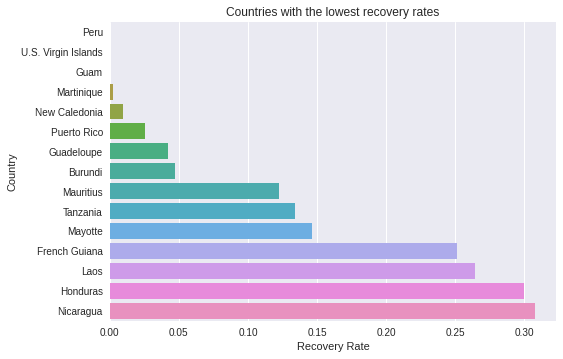

In [16]:
#Top countries with the lowest recovery rates
df_lowest = df.sort_values(by='Recovery_rate', ascending=True)
df_lowest = df_lowest.head(15)
#Graph out top 15 countries with lowest recovery rates 
sns.barplot(data=df_lowest, y='country', x='Recovery_rate')
plt.style.use('seaborn')
plt.xlabel('Recovery Rate')
plt.ylabel('Country')
plt.title("Countries with the lowest recovery rates")
plt.show()

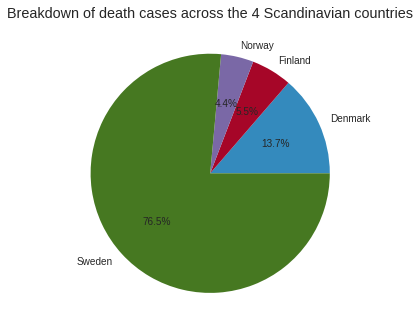

In [17]:
#Compare Scandinavian countries' data to test case for/against the Swedish "model"
scandinavia = df.loc[df['country'].isin(['Denmark', 'Sweden', 'Norway', 'Finland'])]
plt.style.use('bmh')
plt.title("Breakdown of death cases across the 4 Scandinavian countries")
plt.pie(scandinavia.total_death, labels=scandinavia.country, autopct = '%1.1f%%')
plt.show()

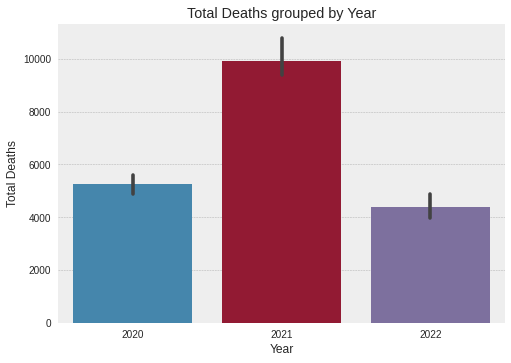

In [18]:
# Review total new deaths within the 3 years of the pandemic using the time series data
#plt.figure(figsize=(2,4),dpi=200)
sns.barplot(data=df_timelines, x='year', y='new_deaths') #label='New Deaths'
plt.style.use('bmh')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.title("Total Deaths grouped by Year")
#plt.legend()
plt.show()

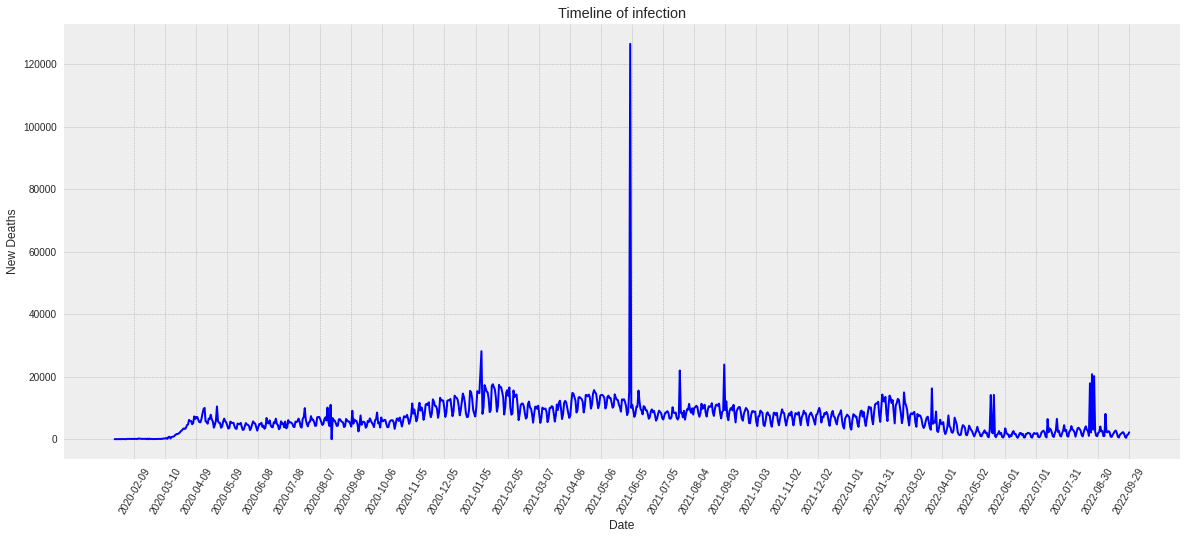

In [19]:
# Graph the trend around new deaths
plt.figure(figsize=(20,8))
plt.plot(df_timelines.date, df_timelines.new_deaths, color='blue')
plt.style.use('bmh')
plt.ylabel('New Deaths')
plt.xlabel('Date')
plt.xticks(df_timelines.date[::30], rotation=60)
#plt.ticklabel_format(useOffset=False)
plt.title("Timeline of infection")
plt.grid(True)

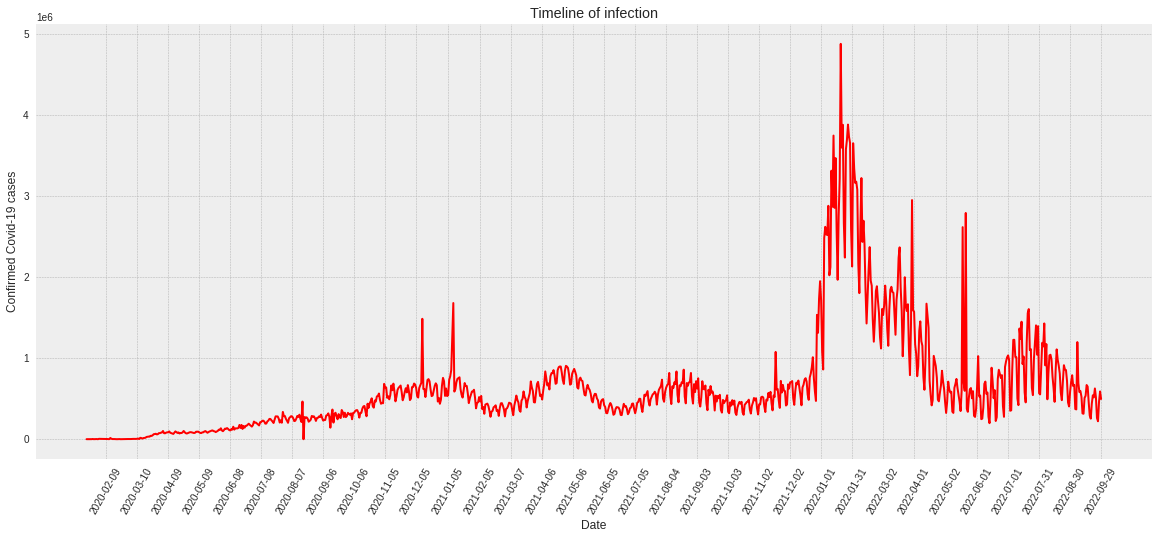

In [20]:
# Graph the evolution of confirmed Covid-19 cases
plt.figure(figsize=(20,8))
plt.plot(df_timelines.date, df_timelines.new_confirmed, color='red')
plt.style.use('bmh')
plt.ylabel('Confirmed Covid-19 cases')
plt.xlabel('Date')
plt.xticks(df_timelines.date[::30], rotation=60)
#plt.ticklabel_format(useOffset=False)
plt.title("Timeline of infection")
plt.grid(True)

In [22]:
#plt.hist('new_deaths')
#plt.show

# 5.Findings and Observations

1. Of the developed countries, the US and the UK have fared the worst in the number of cases and deaths during the pandemic

2. The Swedish "model" has resulted in more casualties than comparable regional / economic peers in Scandinavia